In [31]:
import sys
sys.path.append('../../')
from ML_toolbox import *
import tensorflow as tf

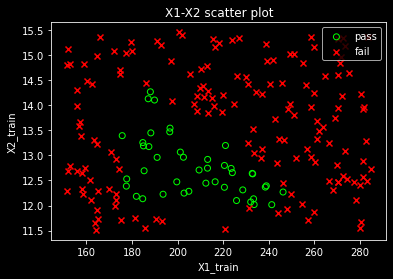

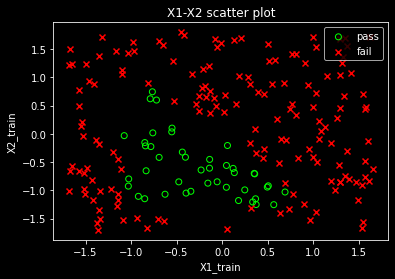

In [32]:
X_train, Y_train = read_data('./data/coffee_roasting_data.txt', feature_count=2)
plot_binary_classification_data(X_train, Y_train)

## Feature scaling
def mean_normalization(X):
    mean = np.mean(X, axis=0)
    X_max = np.max(X, axis=0)
    X_min = np.min(X, axis=0)
    X_scaled = (X - mean) / (X_max - X_min)
    return X_scaled

norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_train)  # learns mean, variance
X_normalized = norm_l(X_train) # gives perfect predictions with 0.5 threshold
#X_normalized = mean_normalization(X_train) .. doesnt give good predictions

plot_binary_classification_data(X_normalized, Y_train)

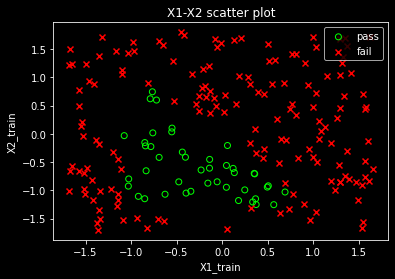

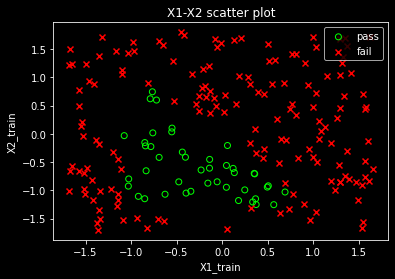

In [33]:
def dense_layer(a_in, W, b, g):
    """
    Numpy implementation of a dense layer
    a = g(z), where z = w*x + b and g(z) is the activation function
    a_in: output of each neuron in previous layer
    W: (n,m) n neurons x m weights each
    b: one for each neuron
    """
    mat_mul = np.matmul(W, a_in)
    z = mat_mul + b
    a_out = g(z)
    return a_out

# Build model
def propagate_forward(x, W1, b1, W2, b2):
    """
    Calculate forward propagation output of NN one example at a time.
    Pass Wi and bi for each layer.
    Wi: (n,m) n neurons x m weights each for ith layer.
    bi: (n,) n values one for each neuron in ith layer.
    """
    # 2 layer model (one hidden and one output)
    a1 = dense_layer(x,  W1, b1, sigmoid)
    a2 = dense_layer(a1, W2, b2, sigmoid)
    return(a2)

def NN_predict(X, W1, b1, W2, b2):
    """
    Feed examples to the NN one example at a time to predict output(probabilities)
    """
    m = X.shape[0]
    P = np.zeros((m,1))
    for i in range(m):
        P[i,0] = propagate_forward(X[i], W1, b1, W2, b2)
    return(P)

## Given weights and biases, predict the output
W1 = np.array( [[-8.93, -0.1], [0.29, -7.32], [12.9, 10.81]] )
b1 = np.array( [-9.82, -9.28,  0.96] )
W2 = np.array([[-31.18, -27.59, -32.56]])
b2 = np.array( [15.41] )


predictions = NN_predict(X_normalized, W1, b1, W2, b2)

# Threshold the predictions
Y_hat = np.where(predictions >=0.5, 1, 0)
Y_hat = Y_hat.reshape(Y_hat.shape[0])

#Plot the predicted values and the ground truth
plot_binary_classification_data(X_normalized, Y_hat)
plot_binary_classification_data(X_normalized, Y_train)